In [1]:
## IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [202]:
pd.set_option('display.max_rows',None)

In [204]:
# 
train= pd.read_csv(r'E:\download\INTERNSHIP\Malignant Comments Classifier Project\train.csv')

In [89]:
#
train.sample(6)

id                                       comment_text  \
75011   c8b202090a15f389  "\n\n ""Encyclopedic value is negligible"" \n\...   
115175  67dd79916ed5197e  it is highly unlikely that the police would re...   
67320   b4203795df42ccbf  Working on it. I can't just change the expansi...   
155203  ba6071c3a9893786                       Dear Jeff G. ツ, BLOW ME FAG!   
16941   2cb1fe3d153f59b5  MfD nomination of User:Rahulgul\n. Your opinio...   
81119   d8fa96d141e4be56  Is somebody here actually trying to say that I...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
75011           0                 0     0       0      0       0  
115175          0                 0     0       0      0       0  
67320           0                 0     0       0      0       0  
155203          1                 0     1       0      1       0  
16941           0                 0     0       0      0       0  
81119           0                 0     0       0      0       0

In [90]:
# LET'S CHECK DATASET SHAPE
train.shape

(159571, 8)

In [91]:
# NO NULL VALUE IN THIS DATASET
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [207]:
# Drop unnecessary column
train.drop('id', axis=1,inplace=True)

In [93]:
# value counts of some categorical features
print(train['malignant'].value_counts())
print(train['highly_malignant'].value_counts(),'\n')
print(train['threat'].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64 

0    159093
1       478
Name: threat, dtype: int64


In [94]:
#
print(train['rude'].value_counts())
print(train['abuse'].value_counts(),'\n')
print(train['loathe'].value_counts())

0    151122
1      8449
Name: rude, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64 

0    158166
1      1405
Name: loathe, dtype: int64


In [208]:
## New column for Lenght of comment
train['length']= [len(word.split()) for word in train['comment_text'][0:]]
train.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length  
0                 0     0       0      0       0      43  
1                 0     0       0      0       0      17  
2                 0     0       0      0       0      42  
3                 0     0       0      0       0     113  
4                 0     0       0      0       0      13

In [209]:
# LET'S CHECK TO HOW MANY COMMENT IN 'COMMENT_TEXT'  ARE 'malignant' 

positive=train[(train['malignant']==0) & (train['highly_malignant']==0)&(train['rude']==0)&(train['threat']==0)&
      (train['abuse']==0)&(train['loathe']==0)].shape

print('numbers of positive comment = ',positive, '\n')

numbers of positive comment =  (143346, 8) 



In [210]:
print(' numbers of negative comment=',159571-143346)

 numbers of negative comment= 16225


In [211]:
 # we created a new feature 'target', in which [malignant,highly-malignant,rude,threat,abuse,loathe] = 1 
#     and remain are equal to zero
train['target']= 1
ind=train[(train['malignant']==0) & (train['highly_malignant']==0)&(train['rude']==0)&(train['threat']==0)&
      (train['abuse']==0)&(train['loathe']==0)].index

train.loc[ind,'target']=0

In [212]:
train['target'].value_counts()

0    143346
1     16225
Name: target, dtype: int64

In [213]:
#
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import  string
punct = string.punctuation

from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()
import re

from nltk.tokenize import word_tokenize, sent_tokenize


In [214]:
#
stop_word= set(stopwords.words('english'))
stop_word.update(('n','c','g','r','nd', 'un','co','th','da','s','z','f','b','u','k'))


# let's clean the data

In [215]:
# convert all message to lower case
train['comment_text']= train['comment_text'].str.lower()

def clean_data(comment):
    text= re.sub(r'\n+',' ', comment)
    text= re.sub(r'http\S+', '', text)
    text= re.sub(r'https?:\/{2}.*?[\s+]', ' ', text ) # remove hyperlink
    text= re.sub(r"can\'t",'can not',text)
    text= re.sub(r"n\'t", ' not', text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text= re.sub('[^A-Za-z]+',' ', text)
    text= re.sub("\s+",' ', text)
    text= ' '.join(e for e in text.split(' ') if e not in stop_word ) # removing stopwords

    return text

In [216]:
#
from tqdm import tqdm
data=[]
for comment in tqdm(train['comment_text'].values):
    sent= clean_data(comment)
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split())  #LEMMATIZATION
    data.append(sent.strip())

100%|██████████| 159571/159571 [00:32<00:00, 4864.28it/s]


In [217]:
# new columns with clean text
train['comment']= data

## New column for Lenght of clean-message
train['clean_length']= [len(word.split()) for word in train['comment'][0:]]
train.head()

comment_text  malignant  \
0  explanation\nwhy the edits made under my usern...          0   
1  d'aww! he matches this background colour i'm s...          0   
2  hey man, i'm really not trying to edit war. it...          0   
3  "\nmore\ni can't make any real suggestions on ...          0   
4  you, sir, are my hero. any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length  target  \
0                 0     0       0      0       0      43       0   
1                 0     0       0      0       0      17       0   
2                 0     0       0      0       0      42       0   
3                 0     0       0      0       0     113       0   
4                 0     0       0      0       0      13       0   

                                             comment  clean_length  
0  explanation edits made username hardcore metal...            23  
1  aww match background colour seemingly stuck th...            10  
2  hey man really trying edit war guy constantly ...            21  
3  make real suggestion improvement wondered sect...            52  
4                      sir hero chance remember page             5

In [218]:
#
# Total length removal
print('original length= ', train.length.sum())
print('clean length= ', train.clean_length.sum()) 

original length=  10734743
clean length=  5442089


In [224]:
# let's check  duplicate value in 'comment' attribute
print(train.duplicated(subset='comment').sum())

# dropped the duplicates rows 
print(train.shape)
train.drop_duplicates(subset='comment',inplace=True, ignore_index=True)
print('dataset shape after dropped duplicate rows',train.shape)

2005
(159571, 11)
dataset shape after dropped duplicate rows (157566, 11)


In [225]:

# removing blank rows 
for i in range(0, len(train['comment'][0:].values)):
    if len(train['comment'][i])<=2:
        print(train['comment'][i], i)     
        train.drop(i, axis=0, inplace=True)

train.reset_index(inplace=True,drop=True)
    # 2 rows contain blank character and some rows have a few charaters 
# so we will have to drop it

 1049
e 6048
p 30246
go 41594
ok 98156
ya 109032
au 149060
le 152064
hi 156752


In [226]:
        # let's remove comment word those have many times in sequentially 
from itertools import groupby
cl=[]
for s in train['comment'][0:].values:
    cl.append(' '.join([key for key, _group in groupby(s.split())]))
train['comment']=cl
print(train.shape)

(157557, 11)


In [227]:

# some duplicate comments are still left which have to be dropped
print(train.duplicated(subset=['comment']).sum())
train.drop_duplicates(subset='comment', inplace=True,ignore_index=True)
print(train.shape)

106
(157451, 11)


In [228]:
#
# Total length removal
print('original length= ', train.length.sum())
print('clean length= ', train.clean_length.sum()) 

original length=  10641892
clean length=  5394395


In [229]:
#
train.head()

comment_text  malignant  \
0  explanation\nwhy the edits made under my usern...          0   
1  d'aww! he matches this background colour i'm s...          0   
2  hey man, i'm really not trying to edit war. it...          0   
3  "\nmore\ni can't make any real suggestions on ...          0   
4  you, sir, are my hero. any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  length  target  \
0                 0     0       0      0       0      43       0   
1                 0     0       0      0       0      17       0   
2                 0     0       0      0       0      42       0   
3                 0     0       0      0       0     113       0   
4                 0     0       0      0       0      13       0   

                                             comment  clean_length  
0  explanation edits made username hardcore metal...            23  
1  aww match background colour seemingly stuck th...            10  
2  hey man really trying edit war guy constantly ...            21  
3  make real suggestion improvement wondered sect...            52  
4                      sir hero chance remember page             5

In [230]:

# Ratio of 'Malignant' and 'Non-Malignant' message
print('malignant ratio=',round(len(train[train['target']==1])/ len(train.target),2)*100,'%')
print('non-malignant ratio=',round(len(train[train['target']==0])/ len(train.target),2)*100,'%')

malignant ratio= 10.0 %
non-malignant ratio= 90.0 %


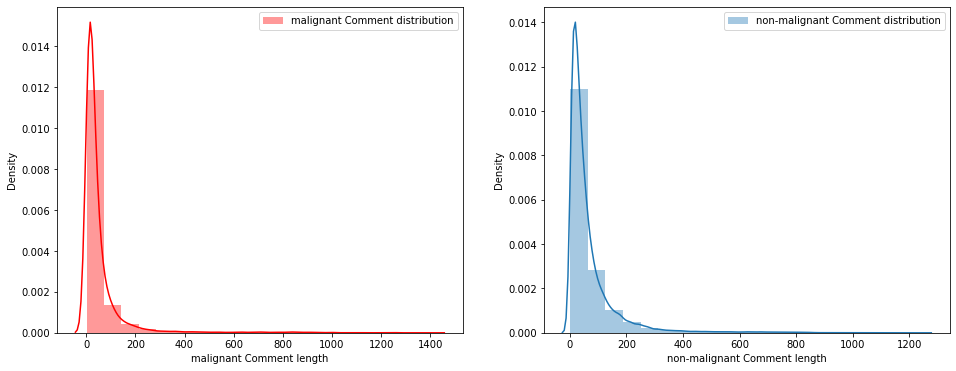

In [219]:
# Comment distribution before cleaning

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(train[train['target']==1]['length'], bins=20, ax=ax[0], label='malignant Comment distribution',color='r')
ax[0].set_xlabel('malignant Comment length')
ax[0].legend()

sns.distplot(train[train['target']==0]['length'], bins=20, ax=ax[1], label='non-malignant Comment distribution')
ax[1].set_xlabel('non-malignant Comment length')
ax[1].legend()
plt.show()

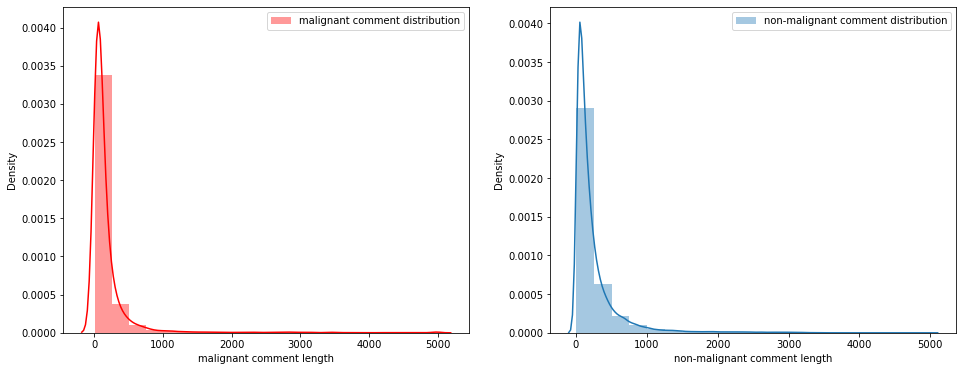

In [39]:
# Comment distribution after text cleaning

f,ax= plt.subplots(1,2,figsize=(16,6))

sns.distplot(train[train['target']==1]['clean_length'], bins=20, ax=ax[0], label='malignant comment distribution',color='r')
ax[0].set_xlabel('malignant comment length')
ax[0].legend()

sns.distplot(train[train['target']==0]['clean_length'], bins=20, ax=ax[1], label='non-malignant comment distribution')
ax[1].set_xlabel('non-malignant comment length')
ax[1].legend()
plt.show()

1    84
0    24
Name: target, dtype: int64


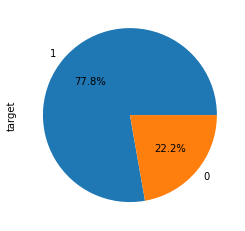

In [220]:

# LET'S CHECK HOW MALIGNANT OR NON-MALIGNANT COMMENTS WITH MAXIMUM words are
train[train['clean_length']>=500]['target'].value_counts().plot.pie(autopct='%1.1f%%')
print(train[train['clean_length']>=500]['target'].value_counts())

# comments with the maximum number of characters are 77 percent malignant

0    62274
1     9695
Name: target, dtype: int64


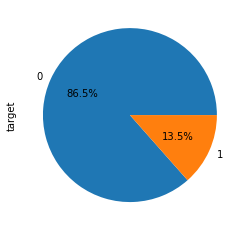

In [222]:
# # LET'S CHECK HOW MALIGNANT OR NON-MALIGNANT COMMENTS WITH MINIMUM words are

train[train['clean_length']<=15]['target'].value_counts().plot.pie(autopct='%1.1f%%')
print(train[train['clean_length']<=15]['target'].value_counts())
# comments with the minimum number of words are 13 percent malignant and 87 percent non-malgnant

<AxesSubplot:xlabel='clean_length', ylabel='Count'>

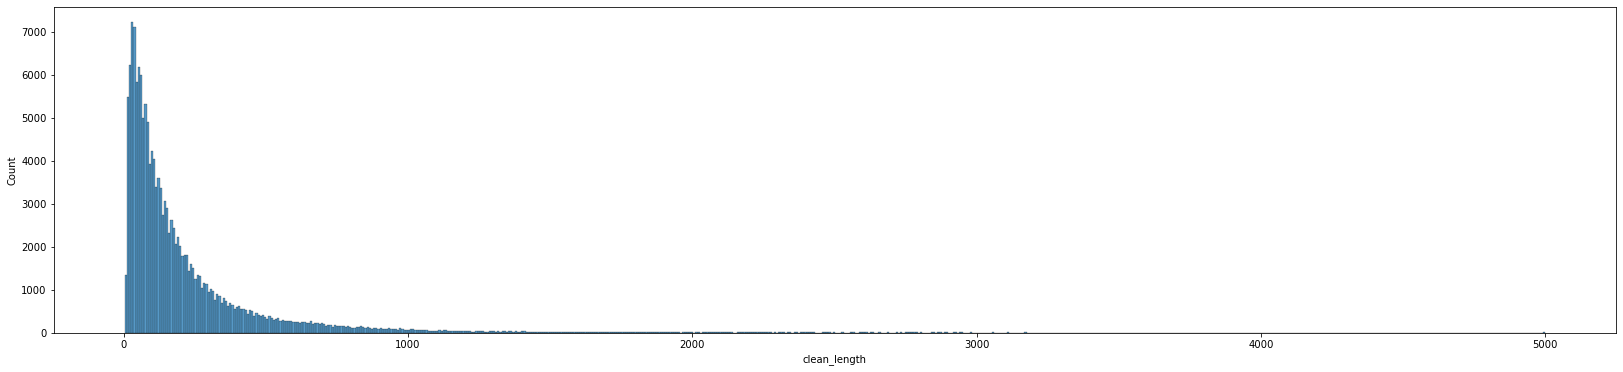

In [70]:
# 90 percent comments with less than 50 words
plt.figure(figsize=(28,6))
sns.histplot(train['clean_length'])

<AxesSubplot:xlabel='clean_length', ylabel='Count'>

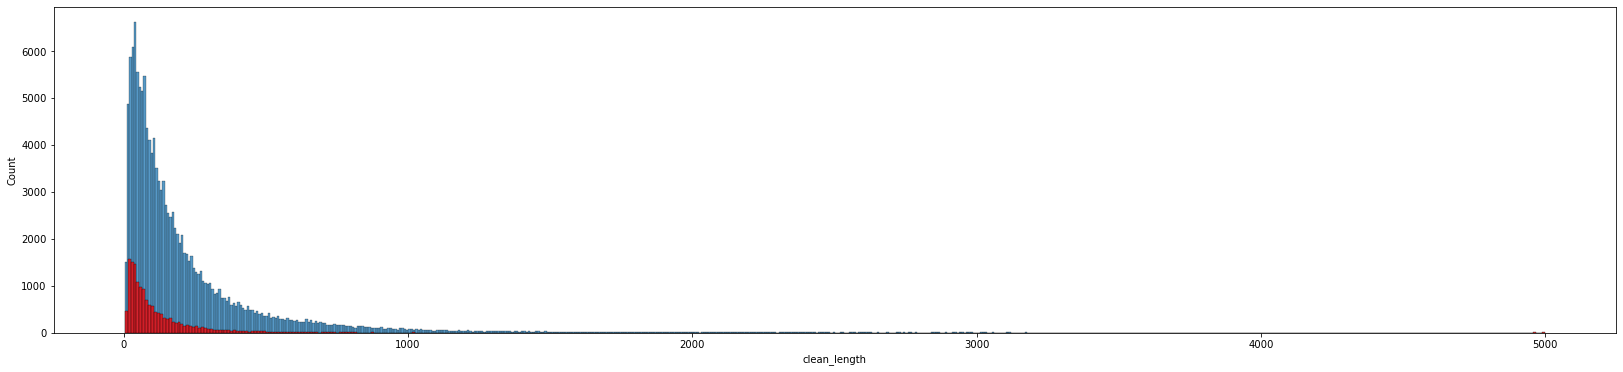

In [69]:
#
plt.figure(figsize=(28,6))
sns.histplot(train[train['target']==0]['clean_length'] )
sns.histplot(train[train['target']==1]['clean_length'],color='r')


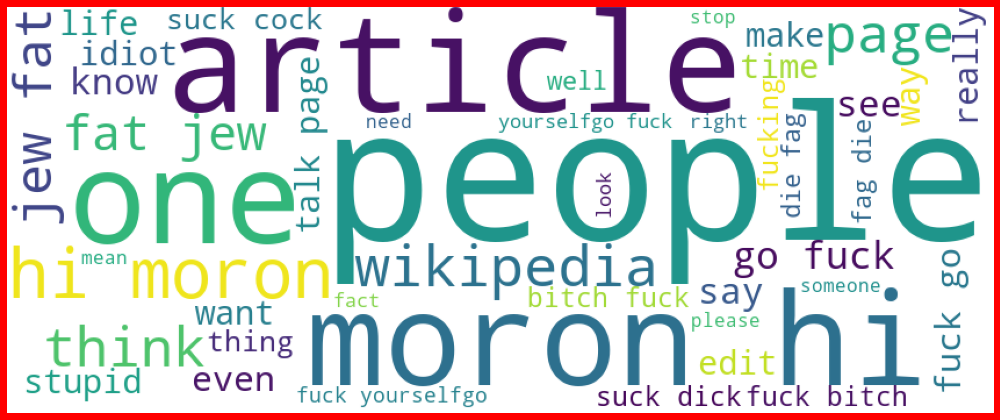

In [231]:
# GETTING SENSE OF CLOUD WORDS OF 'malignant'
from wordcloud import WordCloud

spam= train['comment'][train['target']==1]

spam_cloud= WordCloud(width=850,height=350, background_color='white', max_words=45).generate(' '.join(spam))

plt.figure(figsize=(14,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()
# we can see in this wordcloud picture , maximum words are showing negative meaning 

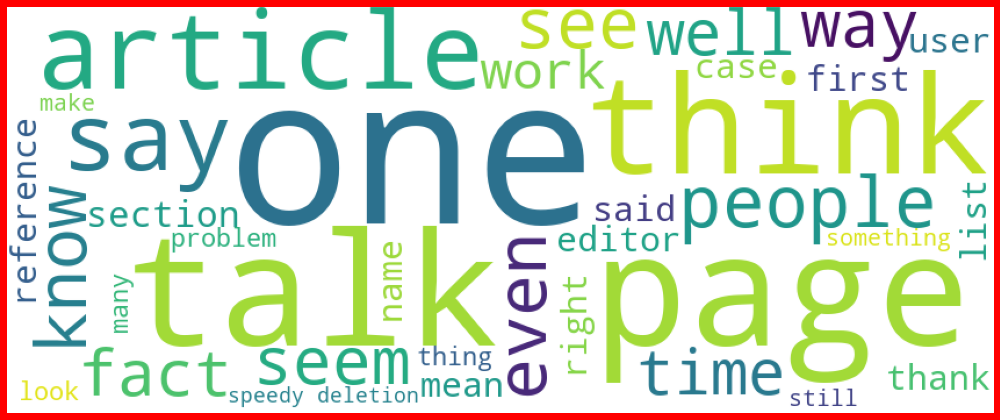

In [232]:
#
# GETTING SENSE OF CLOUD WORDS OF 'non-malignant' comment
from wordcloud import WordCloud

spam= train['comment'][train['target']==0]

spam_cloud= WordCloud(width=850,height=350, background_color='white', max_words=35).generate(' '.join(spam))

plt.figure(figsize=(14,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()
# we can see in this picture that all words are positive meaning


# let's start  train the model

In [126]:
#
train['target'].value_counts()

0    141490
1     15961
Name: target, dtype: int64

In [127]:
y= train['target']  # target
y.shape

(157451,)

In [323]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=140000)
X = tfidf.fit_transform(train['comment'])


In [332]:
# split the dataset into train & test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y ,test_size=0.10, random_state=129,stratify=y)
print('test data shape=',x_test.shape)
print('train data shape=',x_train.shape,'\n')
print(y_test.value_counts())

test data shape= (15746, 140000)
train data shape= (141705, 140000) 

0    14150
1     1596
Name: target, dtype: int64


accuracy_score= 0.9427156103137305
classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     14150
           1       0.84      0.54      0.66      1596

    accuracy                           0.94     15746
   macro avg       0.89      0.76      0.81     15746
weighted avg       0.94      0.94      0.94     15746



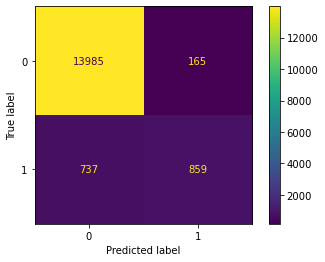

In [398]:
##                 TRAIN THE MODEL USING BY 'MULTINOMIALNB'
m_naive = MultinomialNB(alpha=0.11)
m_naive.fit(x_train, y_train)

m_pred= m_naive.predict(x_test)
print('accuracy_score=',accuracy_score(y_test,m_pred))
print('classification_report: \n',classification_report(y_test,m_pred))

# PLOT CONFUSION MATRIX of MultinomialNB model
cm= confusion_matrix(y_test,m_pred, labels= m_naive.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m_naive.classes_)
disp.plot()                 
plt.show() 

0.9537025276260638
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     14150
           1       0.95      0.57      0.72      1596

    accuracy                           0.95     15746
   macro avg       0.95      0.78      0.84     15746
weighted avg       0.95      0.95      0.95     15746



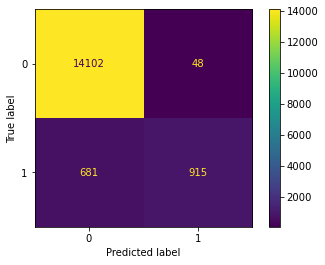

In [356]:

# TRAIN THE MODEL WITH RANDOMFOREST CLASSIFIER

RF= RandomForestClassifier(n_estimators=300,n_jobs=-1,oob_score=True,min_samples_split=3)
RF.fit(x_train, y_train)
rf_pred= RF.predict(x_test)
print(accuracy_score(y_test, rf_pred))
print('classification_report: \n',classification_report(y_test,rf_pred))

# PLOT CONFUSION MATRIX OF RANDOMFOREST MODEL
cm= confusion_matrix(y_test,rf_pred, labels= RF.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot()                 
plt.show()  

In [355]:

##     TRAIN THE MODEL WITH BERNAULINB             
BNB= BernoulliNB(alpha=0.9)
BNB.fit(x_train,y_train)
b_pred = BNB.predict(x_test)
print(accuracy_score(y_test, b_pred))
print(confusion_matrix(y_test,b_pred))


0.9180744316016766
[[13255   895]
 [  395  1201]]



# Load The TEST data and Predict over by built model

In [140]:
# This is Test data for testing the model 
# 
test= pd.read_csv(r'E:\download\INTERNSHIP\Malignant Comments Classifier Project\test.csv')

In [141]:
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [142]:
test.drop('id', axis=1,inplace=True) ## drop feature
test.shape   # Shape of Test data

(153164, 1)


# clean the test data

In [143]:
# convert all message to lower case
test['comment_text']= test['comment_text'].str.lower()

def clean_data(comment):
    text= re.sub(r'\n+',' ', comment)
    text= re.sub(r'http\S+', '', text)
    text= re.sub(r'https?:\/{2}.*?[\s+]', ' ', text ) # remove hyperlink
    text= re.sub(r"can\'t",'can not',text)
    text= re.sub(r"n\'t", ' not', text)
    text= re.sub(r"'", " ' ", text)
    text= re.sub(r'"', ' " ', text)  
    text= re.sub(r"\'ve", ' have', text)
    text= re.sub(r"\'m", ' am', text)
    text= re.sub(r"\'re", ' are', text)
    text= re.sub("\'s", 's', text)
    text= re.sub('[^A-Za-z]+',' ', text)
    text= re.sub("\s+",' ', text)
    text= ' '.join(e for e in text.split(' ') if e not in stop_word ) # removing stopwords
    return text

#
from tqdm import tqdm
test_data=[]
for comment in tqdm(test['comment_text'].values):
    sent= clean_data(comment)
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split())  #LEMMATIZATION
    test_data.append(sent.strip())
    
# new columns with clean text
test['comment_text']= test_data
    

100%|██████████| 153164/153164 [00:28<00:00, 5383.76it/s]


In [144]:

# let's check  duplicate value in 'comment' attribute
print('duplicate rows=',test.duplicated(subset='comment_text').sum())

# dropped the duplicates rows 
test.drop_duplicates(subset='comment_text',inplace=True, ignore_index=True)
print('dataset shape after dropped duplicate rows',test.shape,'\n')

# removing blank rows ans some rows that have only one or two alphabet character
for i in range(0, len(test['comment_text'][0:].values)):
    if len(test['comment_text'][i])<=2:
#        print(test['comment'][i], i)     
        test.drop(i, axis=0, inplace=True)

test.reset_index(inplace=True,drop=True)

    # let's remove comment word those have many times in sequentially 
from itertools import groupby
cl=[]
for s in test['comment_text'][0:].values:
    cl.append(' '.join([key for key, _group in groupby(s.split())]))
test['comment_text']=cl


duplicate rows= 3313
dataset shape after dropped duplicate rows (149851, 1) 



In [145]:
test.head()

comment_text
0  yo bitch ja rule succesful ever whats hating s...
1                                 rfc title fine imo
2                         source zawe ashton lapland
3  look back source information updated correct f...
4                           anonymously edit article

In [324]:
# Vectorization to text data
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf= TfidfVectorizer(max_features=120000)
test_vec = tfidf.transform(test['comment_text'])
test_vec.shape

(149630, 140000)

In [400]:
# Let's Predict the test data with MultinomialNB, BernauliNB and RandomForest model
M_NB_pred=m_naive.predict(test_vec)
B_NB_pred= BNB.predict(test_vec)
RF_pred= RF.predict(test_vec)

In [401]:
predict_data=pd.DataFrame({'comment':test['comment_text'],'M_naive_pred':M_NB_pred,'BNB_pred':B_NB_pred,'RF_pred':RF_pred})

In [402]:
print(predict_data['M_naive_pred'].value_counts(),'\n')
print(predict_data['BNB_pred'].value_counts(),'\n')
print(predict_data['RF_pred'].value_counts())

0    131322
1     18308
Name: M_naive_pred, dtype: int64 

0    114705
1     34925
Name: BNB_pred, dtype: int64 

0    123908
1     25722
Name: RF_pred, dtype: int64


In [403]:
predict_data.sample(20000)

comment  M_naive_pred  \
86268   rfd nomination nigga moment nominated discussi...             0   
145017  every tiny village find bandon thanks spotting...             0   
17720                      lee daly gay boy poop knickers             1   
140059  danice see chosen put back three article usefu...             0   
147740  wp synth clear conclusion drawn combination so...             0   
70002   long time back fair use seems like wrong thing...             0   
97167   fuck one reason wikipedia rag think many blind...             0   
16211                    save preaching someone give shit             0   
51617            know identity jack ripper nice one idiot             1   
59101   nice work emmy howdy nice work rd primetime em...             0   
105919  dick mate fuckin dopey cunt aii change correct...             1   
84406         jump street good man fa gg ot ni gg er je w             0   
87172   limited exception country allow vote two year ...             0   
127031  another dummy pronoun enough linguist sure see...             0   
57256   link could well useful also many ad indiscrimi...             0   
6750    suggesting think posting suggesting think conc...             0   
11665                            exceptional anymore bush             0   
74433   headline textanyne right fucking mind know chr...             0   
116242  let take process step well definitely second p...             0   
110268  transnistria alex please make radical change a...             0   
120727  hey remove think addressed issue mentioned nic...             0   
135685        removed edits education cuba please explain             0   
146781  added info interesting article plus additional...             0   
85792                                listas king long arm             0   
72225   sergio ramos please add analysis wikipedia mus...             0   
46295      penis airway fly penis airway yeeeey penistown             1   
31534   paper kris refers indeed widely cited example ...             0   
82632      hard figure wanted north american page similar             0   
100950                           get back board fuck sake             1   
10137   redirect talk rajdhani express mumbai august k...             0   
48829   one claiming vanatinai matriarchy according le...             0   
29308     first created nojo go school wanted create page             0   
144708  summerslam fa congratulation man summerslam ma...             0   
22963   citation sorry unclear edit summary one intent...             0   
24273                        interest know john broughton             0   
91640    fyi courtesy notice need comment one way another             0   
19028   retail yesterday added vitamin shoppe list sto...             0   
6718                            december archive december             0   
36149   hi thank request unfortunately request decline...             0   
142429  agree scandinavian pronounciation snus rhyme e...             0   
87239   article non encyclopedic whole article filled ...             0   
26773   reference need information reference importanc...             0   
136014                 since fw got turn pain as june utc             0   
92257                                  jason erdakos dumb             0   
92068   wats bein unable edit kazakhstan fuck wrong ba...             1   
56148   cant edit fifa page put spanish commentator en...             0   
2734                           roy keane dog masturbation             0   
14794   que tal elfiltrodenombresnomedejacogerelnombre...             0   
142709  say first stored program computer first comput...             0   
137936                   go suck dick paris jose gonzalez             1   
59853   time go depth right since believe may made ori...             0   
80395   uh oh missed book jesus say basis doctrine fol...             0   
131492      gave real evidence idiot thick headed believe             1   


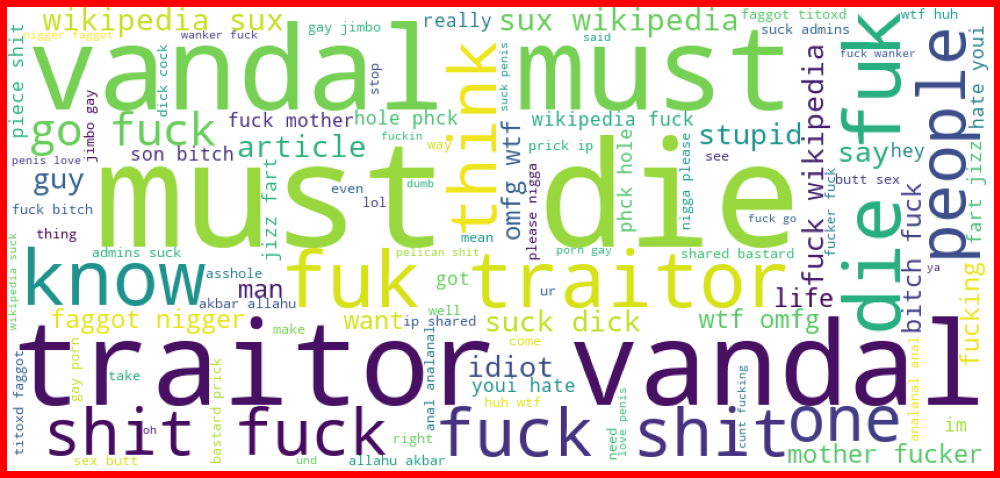

In [415]:
## MULTINIMIAL NB PREDICTED  MALIGNANT WORDCLOUD
# GETTING SENSE OF CLOUD WORDS OF 'malignant' type of comments        
from wordcloud import WordCloud

spam= predict_data['comment'][predict_data['M_naive_pred']==1]

spam_cloud= WordCloud(width=850,height=400, background_color='white', max_words=100).generate(' '.join(spam))

plt.figure(figsize=(14,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()
# we can see in this wordcloud picture , maximum words with negative meaning are visible in WordCloud

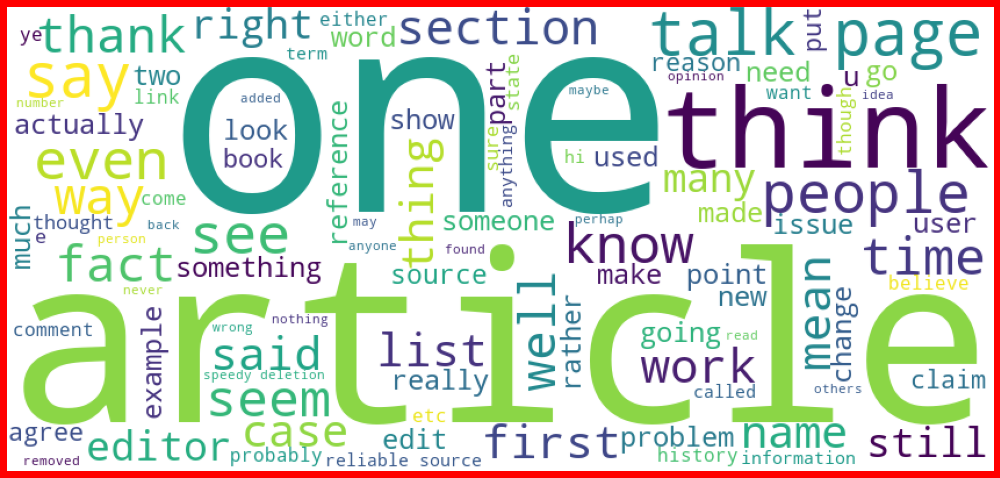

In [416]:
# GETTING SENSE OF CLOUD WORDS OF 'non-malignant' type of comments
from wordcloud import WordCloud

spam= predict_data['comment'][predict_data['M_naive_pred']==0]

spam_cloud= WordCloud(width=850,height=400, background_color='white', max_words=100).generate(' '.join(spam))

plt.figure(figsize=(14,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()
# we can see in this wordcloud picture , No words with negative meanings are visible in WordCloud

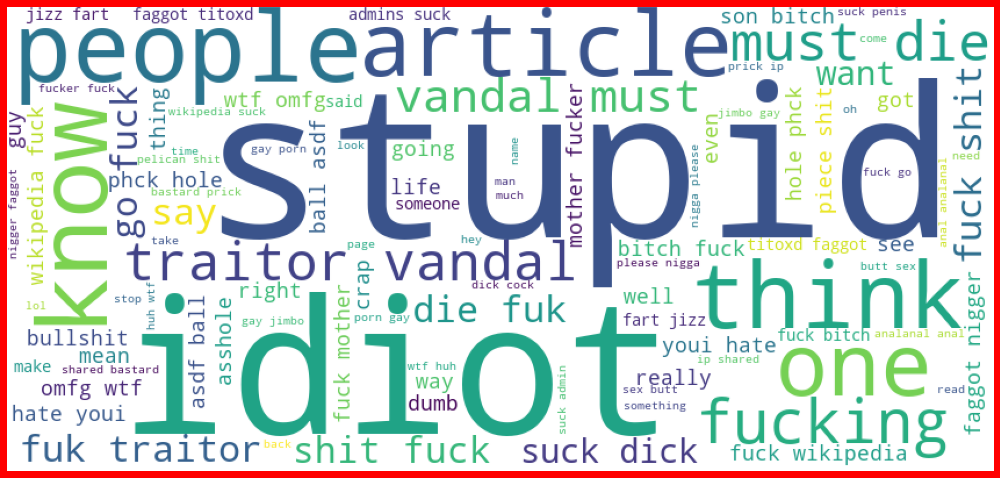

In [412]:
#  ## RANDOMFOREST PREDICTED  MALIGNANT WORDCLOUD

# GETTING SENSE OF CLOUD WORDS OF 'malignant' type of comments        
from wordcloud import WordCloud

spam= predict_data['comment'][predict_data['RF_pred']==1]

spam_cloud= WordCloud(width=850,height=400, background_color='white', max_words=100).generate(' '.join(spam))

plt.figure(figsize=(14,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()
# we can see in this wordcloud picture , maximum words with negative meaning are visible in WordCloud

In [ ]:
INTRODUCTION
⦁	Business Problem Framing
= The proliferation of social media enables people to express their opinions widely online. However,
at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for
users. Although researchers have found that hate is a problem across multiple platforms, 
there is a lack of models for online hate detection
= Important point is , Making a model which can sort out very accurately malignant,rude,threat or loathe types of comments is
difficult task because thousands of language have in this world and all language have diverse types of negative or malignant
words. Those all words keep in while making a model is really difficult task 
=Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive 
comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

⦁	Conceptual Background of the Domain Problem
=  

⦁	Review of Literature
== Important point is , Making a model which can sort out very accurately malignant,rude,threat or loathe types of comments is
difficult task because thousands of language have in this world and all language have diverse types of negative or malignant
words. Those all words keep in while making a model is really difficult task 

##Analytical Problem Framing##
⦁	Mathematical/ Analytical Modeling of the Problem
 In Train Dataset malignant types of comments= 10 percent, and non-malignant types of comments= 90 percent 
. when we checked  distributed of comment's length  then WE saw that most of higher length of comments are related to malignant 
  types of comments
    
⦁	Data Preprocessing Done
= we created a 'target' feature for keeping all negative meanings comments in one feature because Different types of negative
meaning comments were distributed in six columns, to do them in one column had to be made
. In Data-preprocessing main point was to clean the 'comment_text' data and then stemming with Lemmatization, 
 after that Vectorized the clean text data
. we used regex to clean unnecessary alphabets and numerical character from comment_text and then removed stop-word by using 
 stopwords function of NLP
. Stemming the text data by using Lemmatization
. we remove some blank character rows and after drop some duplicates rows
. we created to 'clean_length' feature which show to how many words in clean_text comment
. make visualization on clean_text data like distribution plot, WordCloud, 
. and last we done Vectorized the clean_text data 

⦁	Data Inputs- Logic- Output Relationships
= 

⦁	State the set of assumptions (if any) related to the problem under consideration
= 

⦁	Hardware and Software Requirements and Tools Used
= Making this NLP project by using Pandas,NLTK, matplotlib, WordCloud, regex and sklearn

    
    
## Model/s Development and Evaluation ##
⦁	Identification of possible problem-solving approaches (methods)
= First we cleaned the text data and after that make visualize to understand the data like 
. To check which type of word is more in non-malignant or malignant comments , WordCloud is plotted
. We vectorized the data by using Tf-idf
. we built a model by using MultinomialNB, BernauliNB and RandomForestClassifier

⦁	Testing of Identified Approaches (Algorithms)
 In this dataset
. True-Positive = comments are 'Non-Malignant' and model also predict to 'Non-Malignant'
. True-Negative= comments are 'Malignant' and model also predict to 'Malignant'
. False-Positive= comments are 'Non-Malignant' and model predict to 'Malignant'
. False-Negative= comments are 'Malignant' and model predict to 'Non-Malignant'
= In this Text classification project we used MultinomialNB, BernauliNB and RandomForestClassifier for making the models
  and  BernauliNB performed not so well on this dataset, True-Negative of MultinomialNB model is so high compare to another 
. on this dataset we have to built such types of model whose False-Negative will be minimum
. 
⦁	Key Metrics for success in solving problem under consideration
= In Malignant-comments- classification project, Important point is minimize to False-Negative and we evaluate the model
  by using confusion_matrix 
. we used classification report and confusion_matrix for evaluating the model 

⦁	Interpretation of the Results
= This is a brief description about the information obtained from Visualization, Preprocessing and Modelling on a Dataset.
. From Wordcloud Visualization, we get the information about specific top n words that which are the words that come more 
  in 'malignant' and 'non-malignant' comments
. In preprocessing part we done clean the data,removed stopwords and stemming the data , So that the data can 
   be kept as an input in the model
. 


### CONCLUSION ##
⦁	Key Findings and Conclusions of the Study
. My observation is that the FP rate of the models is coming higher compare to FP rate because the value distributed
  ratio of the Target feature is 90:10 , non-malignant=90%   and  malignant type= 10%
 . And I wanted the model's FN rate to be minimum  
. By making a model on this dataset it was found that there are some words that are only in Malignant comments, 
   if we make models with more and more such words, then it will be easier for the model to predict negative comments
    
⦁	Learning Outcomes of the Study in respect of Data Science
= . In Visualization part, we did visualize the WordCloud to get the information about specific top n words that which are the words that come more 
  in 'malignant' and 'non-malignant' comments 
. text cleaning is more important part of this project, we did known from text-cleaning that 35 percent words of whole data
  are unnecessary
. we built model by using MultinomialNB, BernauliNB and RandomForest but these all three model result are different 
   FP rate of MultinomialNB is minimum but FN is so high this is not good for this project
   FP & FN rate of RandomForest are more than 400 
  if the target feature was balanced , then it is more likely that the result would have been higher than the imbalanced target
    
    
THIS IS a nlp project whose purpose is to identify negative or malignant type and positive types of comments, if we train
the model on as many malignant types comments or message  as possible while making the model, then there is a more chance 
that the malignant type of comments can be sorted